# Random Forest model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Banking Marketing Dataset
**Data Source:** [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

#### Columns Description:

<img src='./column_description.png'/>   
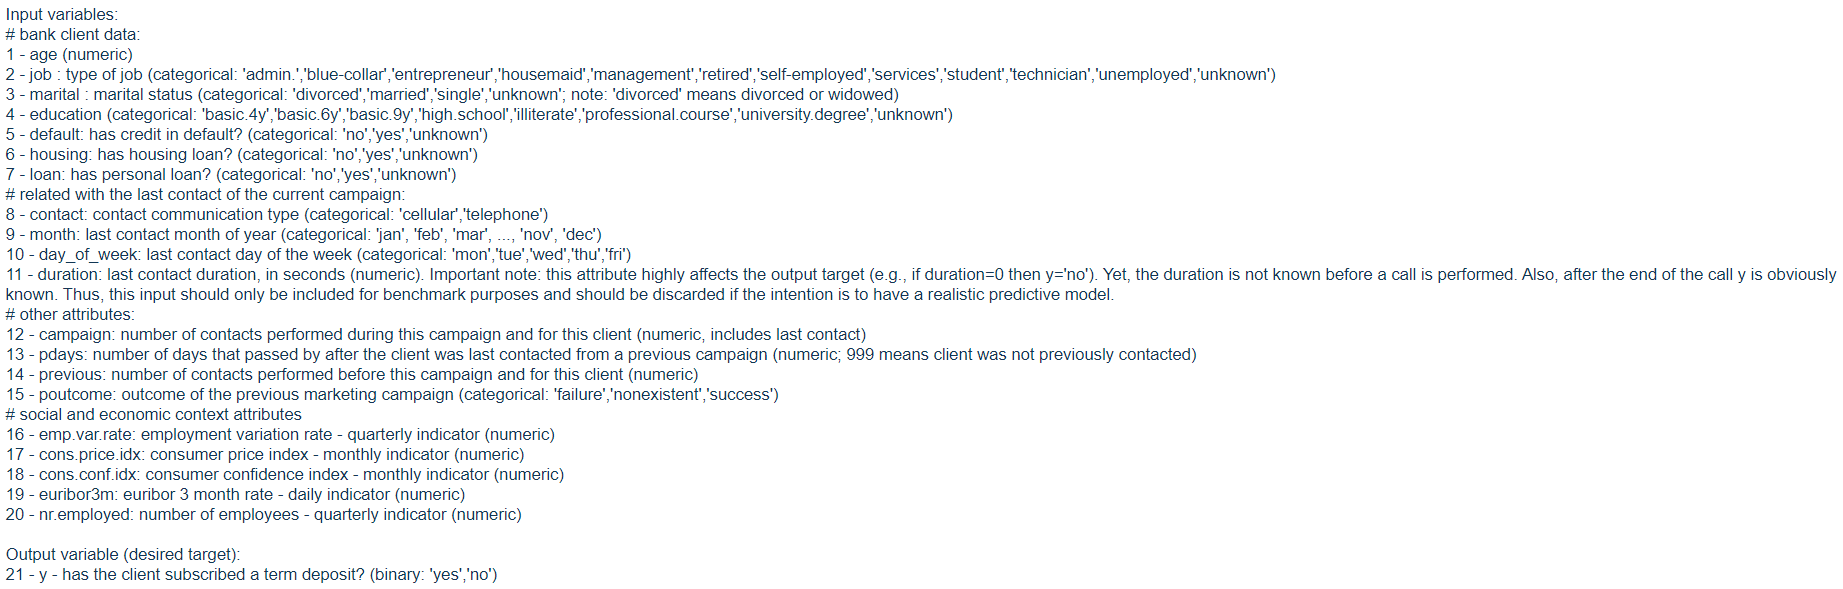

In [18]:
bank_df = pd.read_csv('./data/bank.csv', sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Change target (y) to numeric.**

In [19]:
bank_df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [21]:
bank_df.y = bank_df.y.replace({'yes': 1, 'no': 0})
bank_df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [22]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


### EDA

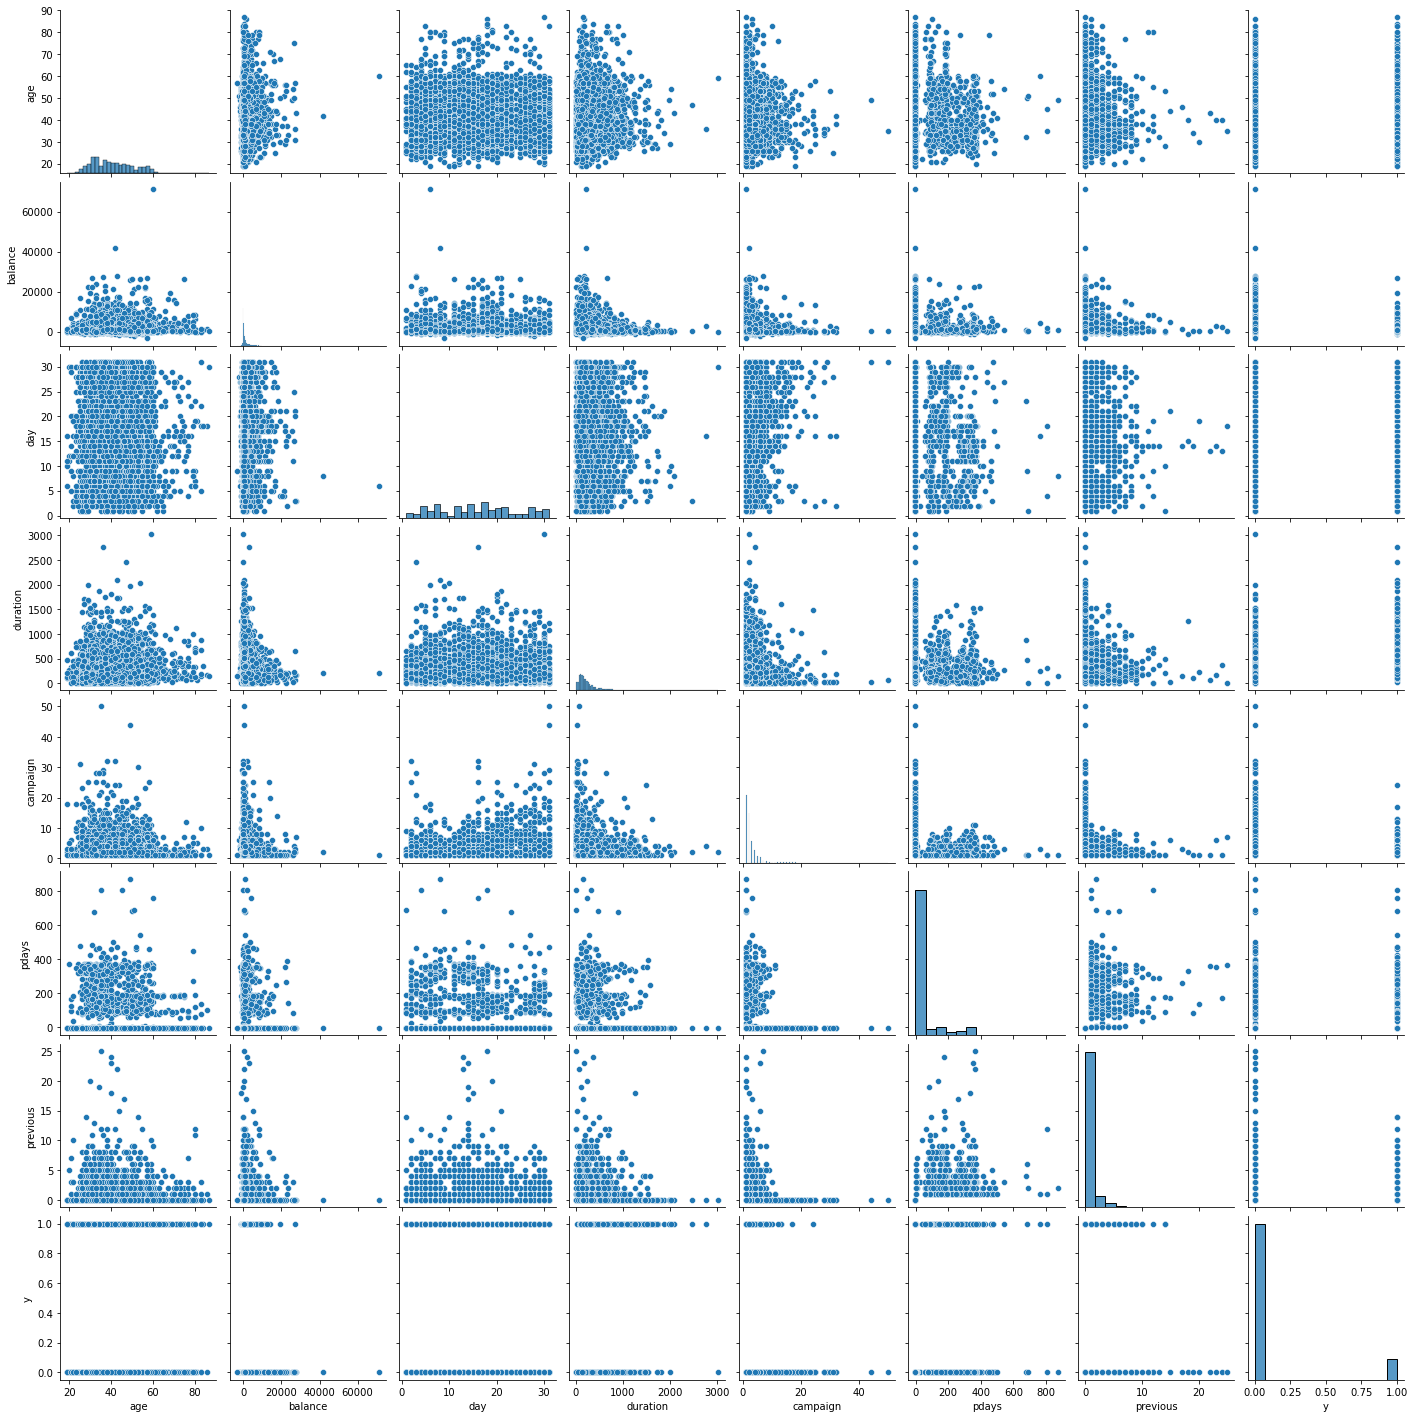

In [23]:
sns.pairplot(bank_df)

<AxesSubplot:>

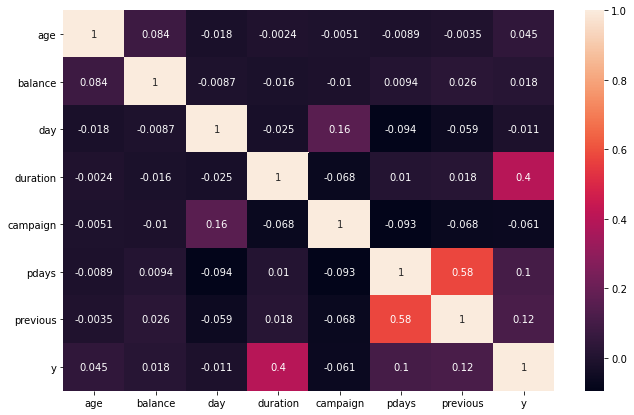

In [30]:
bank_corr = bank_df.corr()
plt.figure(figsize=(11,7))
sns.heatmap(bank_corr, annot=True)

In the following plot we can see that the people with an age between 31 and 38 is more frequently invest in bank term.

Text(0.5, 1.0, 'Bank term deposit Yes by Age')

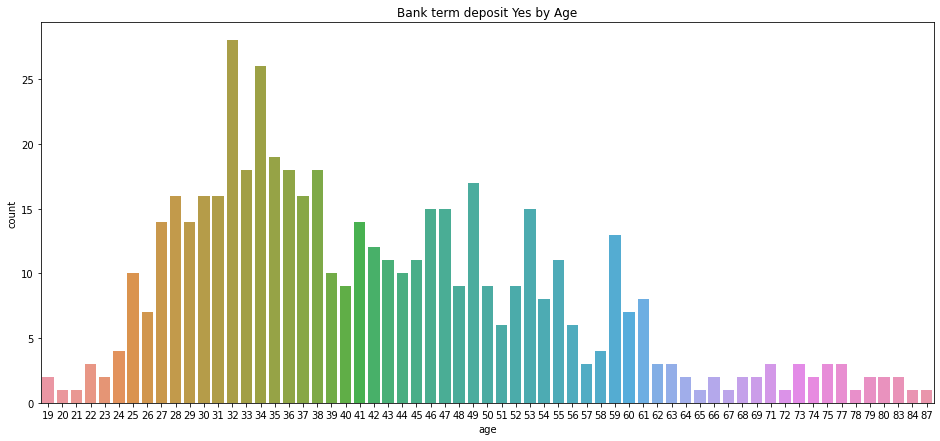

In [29]:
plt.figure(figsize=(16,7))
sns.countplot(data = bank_df[bank_df.y == 1], x = 'age')
plt.title('Bank term deposit Yes by Age')

<AxesSubplot:xlabel='job', ylabel='count'>

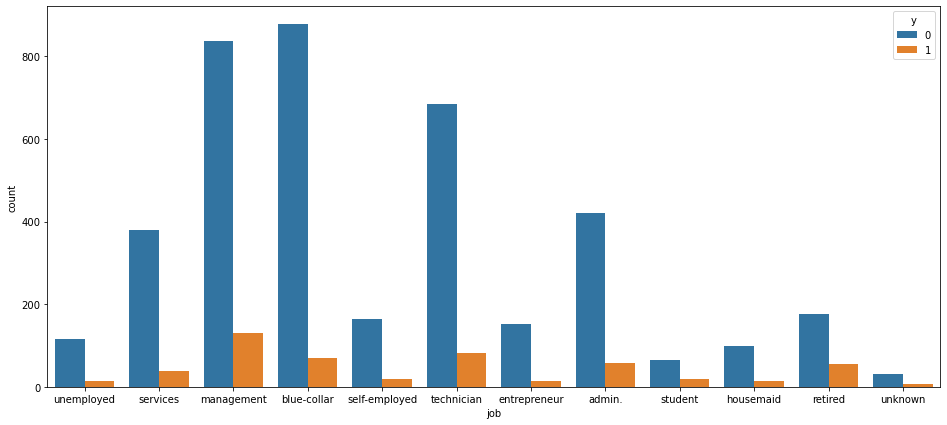

In [33]:
plt.figure(figsize=(16,7))
sns.countplot(data = bank_df, x = 'job', hue='y')

In the previous graph it can be seen that people with the management position have a greater chance of obtaining bank term.

<AxesSubplot:xlabel='default', ylabel='count'>

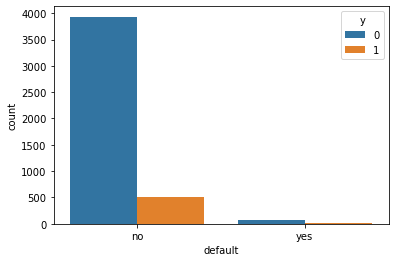

In [34]:
sns.countplot(data = bank_df, x = 'default', hue = 'y')

We can see that `default` feature have a strong relationchip with the target, so i'm going to keep this feature also.

<AxesSubplot:xlabel='contact', ylabel='count'>

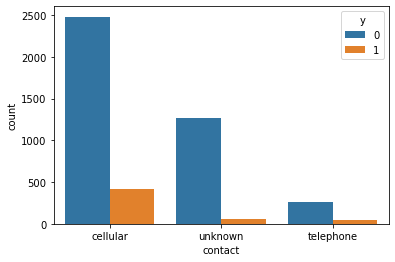

In [36]:
sns.countplot(data = bank_df, x = 'contact', hue='y')

In [42]:
contact_0 = bank_df[bank_df.y == 0].groupby('contact').count()['y']
contact_1 = bank_df[bank_df.y == 1].groupby('contact').count()['y']

Text(0.5, 1.0, 'Bank term Contact ratio')

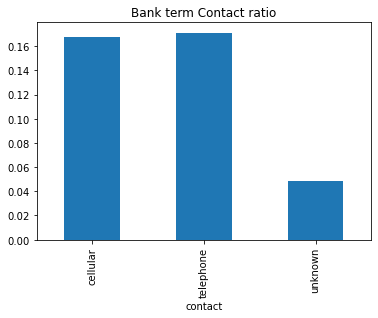

In [45]:
(contact_1/contact_0).plot(kind='bar')
plt.title('Bank term Contact ratio')

In [46]:
bank_df.drop('contact', axis=1, inplace=True)

There is no difference between the ratio of cell phone and phone, so I am going to ***drop*** this feature.

Text(0.5, 1.0, 'Housing loan')

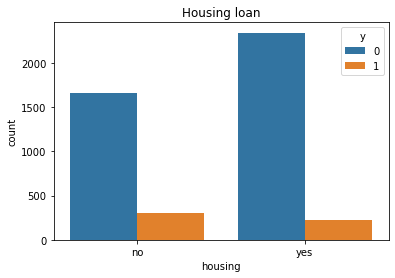

In [51]:
sns.countplot(x = bank_df.housing, hue = bank_df.y)
plt.title('Housing loan')

Text(0.5, 1.0, 'Personal loan')

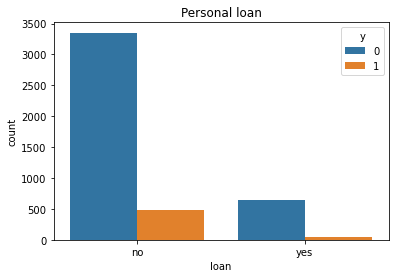

In [52]:
sns.countplot(x = bank_df.loan, hue = bank_df.y)
plt.title('Personal loan')

`housing` and `loan` features have different distributions for bank term deposit, so i'm going to keep both.

Text(0.5, 1.0, 'Bank term by days')

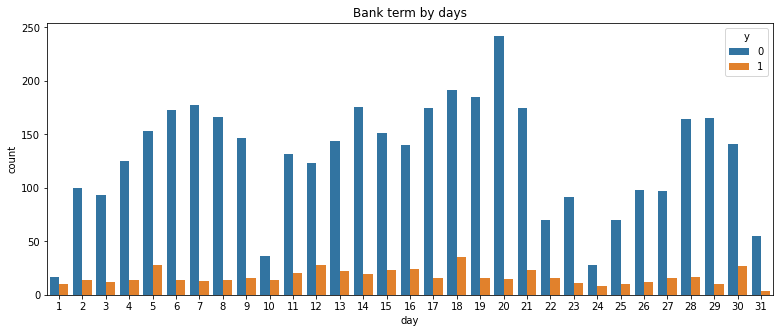

In [54]:
plt.figure(figsize=(13,5))
sns.countplot(data = bank_df, x = 'day', hue='y')
plt.title('Bank term by days')

According with the previous plot the some days have **more** than others, so this feature is valuable for the model. I'm keep it.

<AxesSubplot:xlabel='education', ylabel='count'>

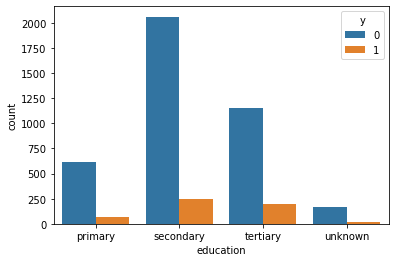

In [56]:
sns.countplot(data = bank_df, x = 'education', hue = 'y')

Calculating the ratio for each column

<AxesSubplot:xlabel='education'>

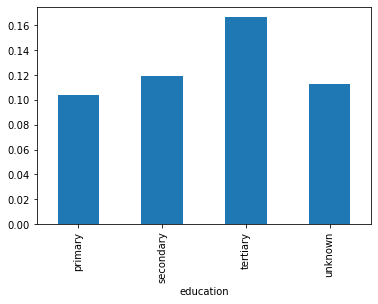

In [61]:
education_0 = bank_df[bank_df.y == 0].groupby('education').count()['y']
education_1 = bank_df[bank_df.y == 1].groupby('education').count()['y']
(education_1/education_0).plot(kind='bar')

The distribution and ratio of this feature **vary**, so keep this for the model.

In [62]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown,0


<AxesSubplot:xlabel='poutcome', ylabel='count'>

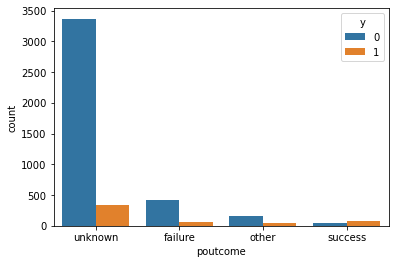

In [63]:
sns.countplot(data = bank_df, x = 'poutcome', hue ='y')

<AxesSubplot:xlabel='poutcome'>

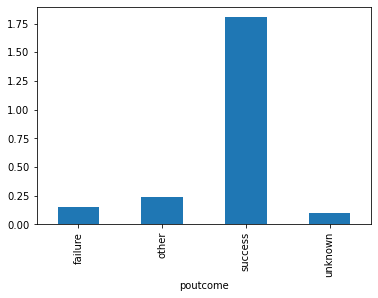

In [64]:
poutcome_0 = bank_df[bank_df.y == 0].groupby('poutcome').count()['y']
poutcome_1 = bank_df[bank_df.y == 1].groupby('poutcome').count()['y']
(poutcome_1/poutcome_0).plot(kind='bar')

### Feature Engineering & Model creation 

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score

**Label Encoding**

To encode all the categorical features, i create a class to transform all the features at once.

In [97]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
df_encoding = MultiColumnLabelEncoder(columns = bank_df.select_dtypes(['object', 'category']).columns).fit_transform(bank_df)

In [98]:
df_encoding.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,5,8,226,1,-1,0,3,0


**Baseline:**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_encoding.drop('y', axis=1), df_encoding.y, test_size=0.2)

In [100]:
bank_df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

The mayority is 0, so i'm going to calculate the baseline predicted every record as 0.

In [101]:
baseline_pred = np.full(len(X_test), 0)

In [102]:
print("--------- Baseline Score ----------")
print("Accuracy: ", accuracy_score(y_test, baseline_pred))

--------- Baseline Score ----------
Accuracy:  0.8861878453038674


**Random Forest using Pipeline**

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
clf = RandomForestClassifier(n_estimators=2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

**Train Score**

In [147]:
clf.score(X_train, y_train)

0.9480088495575221

**Test Score**

In [148]:
clf.score(X_test, y_test)

0.8883977900552487

Analyzing the results of train and test, overfitting can be observed, so in the train part we have a very good score but the test part is very far from that score.

That said, I'm going to use **GridSearchCV** to find the better number of estimators to improve the score.

In [142]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf, param_grid={'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]})

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=9),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]})

In [143]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.042085,0.001935,0.004189,0.000405,15,{'n_estimators': 15},0.886740,0.908714,0.889350,0.899032,0.899032,0.896574,0.007853,1
11,0.035530,0.003697,0.003783,0.000400,12,{'n_estimators': 12},0.897790,0.905947,0.893499,0.887967,0.890733,0.895187,0.006283,2
4,0.016995,0.000648,0.003201,0.000412,5,{'n_estimators': 5},0.879834,0.903181,0.894882,0.900415,0.892116,0.894086,0.008129,3
13,0.039488,0.001745,0.004389,0.000487,14,{'n_estimators': 14},0.883978,0.903181,0.885201,0.896266,0.900415,0.893808,0.007852,4
12,0.038982,0.002526,0.003983,0.000010,13,{'n_estimators': 13},0.883978,0.890733,0.894882,0.903181,0.894882,0.893531,0.006259,5


According with the results, the better number of estimators is `15`. Here is the score with this hyperparameter.

In [ ]:
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X_train, y_train)

**Train Score**

In [144]:
clf.score(X_train, y_train)

0.990320796460177

**Test Score**

In [145]:
clf.score(X_test, y_test)

0.8928176795580111